In [37]:
# To plot the graphs in the notebook itself
%matplotlib inline

In [38]:
import seaborn as sns  # Plot our graph
from sklearn.tree import DecisionTreeClassifier  # Decision Tree Classifier to build our model
from sklearn.metrics import accuracy_score  # Caluclate the Accuracy of our Model 
from sklearn.model_selection import train_test_split  # To split our data into training and testing
import pandas as pd  # To read our dataset

In [39]:
# Process our dataset
url = 'datasets/iris.csv'
data = pd.read_csv(url)
data = data.dropna(axis=0)
data.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [40]:
# The feature we want to predict is stored in y
y = data['Species']

# Features on which our final result depends on, is stored in features
features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
X = data[features]

In [41]:
# A function to build a model, fit our data and return it
def buildModel(train_X, train_y, random):
    model = DecisionTreeClassifier(random_state=random)
    model.fit(train_X, train_y)
    return model

In [42]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1) # Split our data in
dt_model = buildModel(train_X, train_y, 4) # Call our buildModel function, and we pass the training data along with random state
prediction_y = dt_model.predict(val_X)  # Use our model to predict the data on val_X

# prediction_y contains our predicted answers on val_X, and val_y has true answers based on val_X

print(accuracy_score(val_y, prediction_y) * 100)  # Print the accuract=y of our model

97.36842105263158


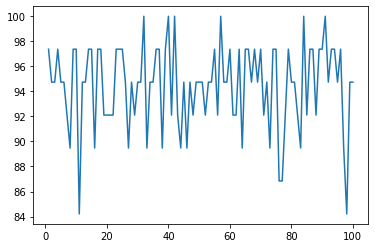

In [45]:
# EXTRA CODE

# We will plot a graph for the accuracy of model generated vs the random_state used

X_plot = []  # This will store the random values used
y_plot = []  # This will store the corresponding accuracy
for random in range(1, 101):
    X_plot.append(random)  # We add the random value which will be used
    
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = random)
    dt_model = buildModel(train_X, train_y, random)
    prediction_y = dt_model.predict(val_X)
    score = accuracy_score(val_y, prediction_y) * 100
    y_plot.append(score)
    
sns.lineplot(X_plot, y_plot)